# Contact
Created by: Ania Supady <p/>
Date:       07/2022 <p/>
>www.linkedin.com/in/aniasupady <p/>
>ania.b.supady@gmail.com

# Introduction
The purpose of this Colab is to gather best practices through the research and analysis and apply it to simple bank loan data for the purpose of exploration of PD scorecard modeling best practices.

[Source 1](https://github.com/CBravoR/AdvancedAnalyticsLabs/tree/master/notebooks/python)

[Source 2](https://github.com/ShichenXie/scorecardpy)

# Import Data

* Using : scikit-learn package and pandas

In [ ]:
#Setting libraries


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import os
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook

In [ ]:
#Get the bank loan data

!wget --no-check-certificate --output-document=Bankloan.csv 'https://docs.google.com/spreadsheets/d/1nUJ1fA5f1VeMvulknpsvxpy0GW3CekNnhgeLRK0WlDI/export?gid=1016776666&format=csv'

--2022-09-14 21:27:39--  https://docs.google.com/spreadsheets/d/1nUJ1fA5f1VeMvulknpsvxpy0GW3CekNnhgeLRK0WlDI/export?gid=1016776666&format=csv
Resolving docs.google.com (docs.google.com)... 142.250.125.100, 142.250.125.101, 142.250.125.139, ...
Connecting to docs.google.com (docs.google.com)|142.250.125.100|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0o-8s-sheets.googleusercontent.com/export/3sm34aofsvmt5ehut1q6bddr3o/bgk2qo5bkulk99f6vp1go7n4gg/1663190855000/102123285539774178265/*/1nUJ1fA5f1VeMvulknpsvxpy0GW3CekNnhgeLRK0WlDI?gid=1016776666&format=csv [following]
--2022-09-14 21:27:39--  https://doc-0o-8s-sheets.googleusercontent.com/export/3sm34aofsvmt5ehut1q6bddr3o/bgk2qo5bkulk99f6vp1go7n4gg/1663190855000/102123285539774178265/*/1nUJ1fA5f1VeMvulknpsvxpy0GW3CekNnhgeLRK0WlDI?gid=1016776666&format=csv
Resolving doc-0o-8s-sheets.googleusercontent.com (doc-0o-8s-sheets.googleusercontent.com)... 108.177.120.132, 2607:f8b0:4001:c18:

In [ ]:
!head Bankloan.csv

bankloan_data2 = pd.read_csv('Bankloan.csv')

bankloan_data=bankloan_data2.copy()

bankloan_data.describe()

bankloan_data.info()

customer,Age,Education,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default
10012,28,Med,7,2,44,17.7,2.99,4.8,0.58,0
10017,64,Posg,34,17,116,14.7,5.05,12,0.27,0
10030,40,Bas,20,12,61,4.8,1.04,1.89,0.13,0
10039,30,Bas,11,3,27,34.5,1.75,7.56,1.62,0
10069,25,Bas,2,2,30,22.4,0.76,5.96,0.97,1
10071,35,Bas,2,9,38,10.9,1.46,2.68,0.4,1
10096,26,SupInc,2,4,38,11.9,0.95,3.57,0.43,1
10128,25,Bas,4,2,30,14.4,1.05,3.27,0.62,0
10129,65,SupCom,29,14,189,5,3.36,6.09,0.08,0


,customer,Age,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default
count,1500.000000,1500.000000,1500.000000,1499.000000,1499.000000,1499.000000,1499.000000,1489.000000,1500.000000,1500.000000
mean,257714.548000,34.174000,6.952000,6.309540,59.615077,677.046631,1.936197,3.872257,0.365447,0.365333
std,139555.147719,13.142306,8.977644,6.047563,67.144768,25828.218141,2.974485,5.343150,0.293937,0.481684
min,10012.000000,18.000000,0.000000,0.000000,12.000000,0.100000,0.000000,0.100000,0.000000,0.000000
25%,98638.750000,24.000000,0.000000,2.000000,27.000000,4.800000,0.420000,1.120000,0.150000,0.000000
50%,315991.500000,31.000000,4.000000,5.000000,40.000000,8.500000,0.990000,2.240000,0.290000,0.000000
75%,370701.500000,42.000000,10.000000,9.000000,64.000000,13.600000,2.200000,4.610000,0.500000,1.000000
max,453777.000000,79.000000,63.000000,34.000000,1079.000000,999999.000000,35.970000,63.470000,2.150000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer     1500 non-null   int64  
 1   Age          1500 non-null   int64  
 2   Education    1500 non-null   object 
 3   Employ       1500 non-null   int64  
 4   Address      1499 non-null   float64
 5   Income       1499 non-null   float64
 6   Leverage     1499 non-null   float64
 7   Creddebt     1499 non-null   float64
 8   OthDebt      1489 non-null   float64
 9   MonthlyLoad  1500 non-null   float64
 10  Default      1500 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 129.0+ KB


## Kernell Density Plots


A density plot is a smoothed, continuous version of a histogram estimated from the data. The most common form of estimation is known as kernel density estimation. In this method, a continuous curve (the kernel) is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation. The kernel most often used is a Gaussian (which produces a Gaussian bell curve at each data point).


[Source](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)

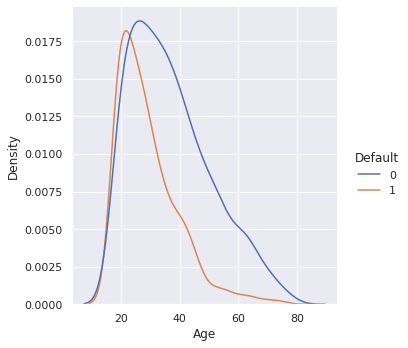

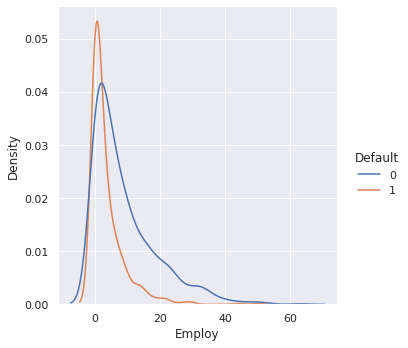

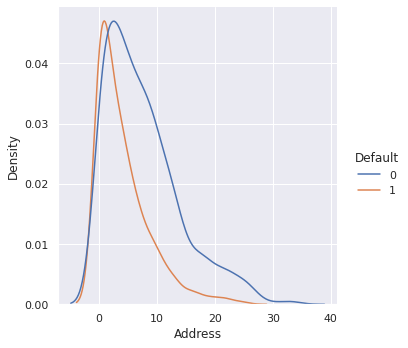

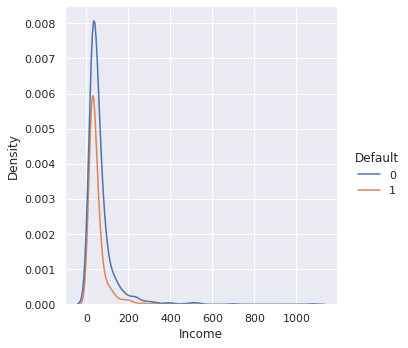

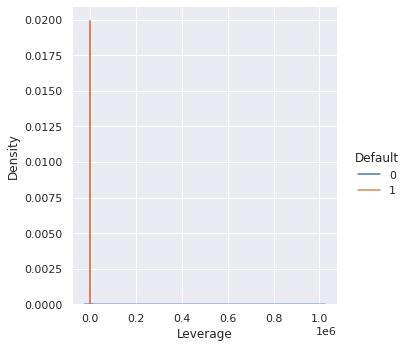

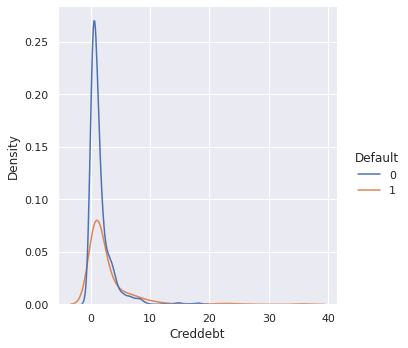

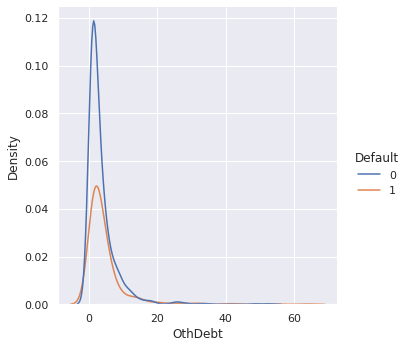

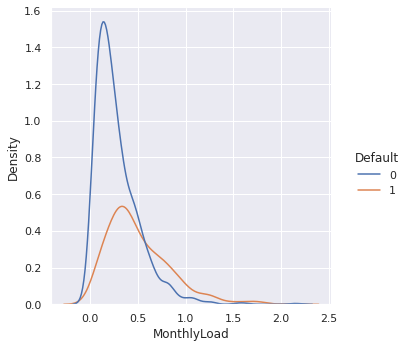

In [ ]:
sns.set(color_codes=True)

#Note: The np.r_[1,3:9] indicates:
# 1=for the first position  for index variable =col_id
# 3:9=start counting from index variable=1, customer=2, age=3 and Default=10 position in the data set.
# We are asking to loop the same kernell density graph for all 8 varibles by binary variable default

for col_id in bankloan_data.columns[np.r_[1,3:10]]:
    sns.displot(data = bankloan_data, x = col_id, hue = "Default", kind = 'kde')

## Correlation hexbins

Unlike in the scatter plots above, a hexbin plot automatically returns values using a color gradient for density.

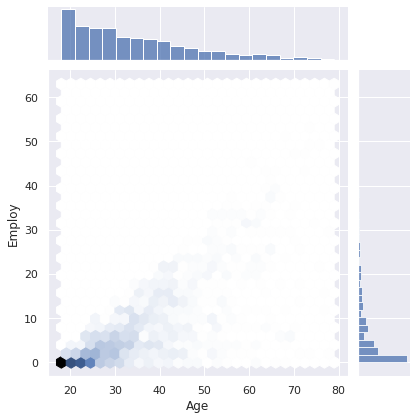

In [ ]:
sns.jointplot(data=bankloan_data, x="Age", y="Employ", kind="hex")
plt.show()

## Null values

In [ ]:
bankloan_data.isnull().any()
null_columns = bankloan_data.columns[bankloan_data.isnull().any()]
bankloan_data[null_columns].isnull().sum()

customer       False
Age            False
Education      False
Employ         False
Address         True
Income          True
Leverage        True
Creddebt        True
OthDebt         True
MonthlyLoad    False
Default        False
dtype: bool

Address      1
Income       1
Leverage     1
Creddebt     1
OthDebt     11
dtype: int64

In [ ]:
bankloan_data.loc[bankloan_data.isnull().any(axis = 1), :]
bankloan_data.OthDebt.describe()

,customer,Age,Education,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default
17,10423,19,Bas,2,0.0,31.0,0.3,0.02,NaN,0.01,1
247,71896,20,SupInc,0,0.0,21.0,1.3,0.18,NaN,0.07,1
255,72327,19,Med,0,NaN,NaN,NaN,NaN,NaN,0.01,1
293,74471,39,Bas,8,9.0,41.0,0.1,0.03,NaN,0.00,0
587,244023,31,SupCom,1,7.0,69.0,0.4,0.19,NaN,0.01,0
745,315892,22,SupInc,0,1.0,14.0,2.5,0.26,NaN,0.20,0
748,315948,41,Med,21,9.0,64.0,0.3,0.12,NaN,0.01,0
817,335635,18,Med,0,0.0,24.0,0.9,0.13,NaN,0.05,1
1194,372485,20,SupInc,0,0.0,13.0,1.1,0.05,NaN,0.10,0
1254,376801,23,SupCom,0,2.0,19.0,1.4,0.18,NaN,0.09,0


count    1489.000000
mean        3.872257
std         5.343150
min         0.100000
25%         1.120000
50%         2.240000
75%         4.610000
max        63.470000
Name: OthDebt, dtype: float64

In [ ]:
# Replace invalid outlier.
bankloan_data.Leverage.values[bankloan_data.Leverage.values == 999999] = np.NaN
bankloan_data.loc[bankloan_data.isnull().any(axis = 1), :]

,customer,Age,Education,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default
17,10423,19,Bas,2,0.0,31.0,0.3,0.02,NaN,0.01,1
247,71896,20,SupInc,0,0.0,21.0,1.3,0.18,NaN,0.07,1
255,72327,19,Med,0,NaN,NaN,NaN,NaN,NaN,0.01,1
293,74471,39,Bas,8,9.0,41.0,0.1,0.03,NaN,0.00,0
587,244023,31,SupCom,1,7.0,69.0,0.4,0.19,NaN,0.01,0
745,315892,22,SupInc,0,1.0,14.0,2.5,0.26,NaN,0.20,0
748,315948,41,Med,21,9.0,64.0,0.3,0.12,NaN,0.01,0
817,335635,18,Med,0,0.0,24.0,0.9,0.13,NaN,0.05,1
1194,372485,20,SupInc,0,0.0,13.0,1.1,0.05,NaN,0.10,0
1254,376801,23,SupCom,0,2.0,19.0,1.4,0.18,NaN,0.09,0


In [ ]:
# Fills out the null values with zeros. Inplace argument changes dataframe.
bankloan_data.OthDebt.fillna(value = 0, inplace=True)
bankloan_data.loc[bankloan_data.isnull().any(axis = 1), :]

,customer,Age,Education,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default
255,72327,19,Med,0,NaN,NaN,NaN,NaN,0.0,0.01,1
1395,382157,20,SupInc,0,0.0,13.0,NaN,0.0,0.0,0.00,0


In [ ]:
# Fill out remaining elements.
bankloan_data.fillna(bankloan_data.median(), inplace=True)
bankloan_data.loc[bankloan_data.isnull().any(axis = 1), :]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,customer,Age,Education,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default


In [ ]:
bankloan_data.describe()

,customer,Age,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,257714.548000,34.174000,6.952000,6.308667,59.602000,9.940600,1.935567,3.843860,0.365447,0.365333
std,139555.147719,13.142306,8.977644,6.045640,67.124278,6.662313,2.973593,5.333758,0.293937,0.481684
min,10012.000000,18.000000,0.000000,0.000000,12.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,98638.750000,24.000000,0.000000,2.000000,27.000000,4.800000,0.420000,1.107500,0.150000,0.000000
50%,315991.500000,31.000000,4.000000,5.000000,40.000000,8.500000,0.990000,2.215000,0.290000,0.000000
75%,370701.500000,42.000000,10.000000,9.000000,64.000000,13.525000,2.200000,4.572500,0.500000,1.000000
max,453777.000000,79.000000,63.000000,34.000000,1079.000000,40.700000,35.970000,63.470000,2.150000,1.000000


## Outliers

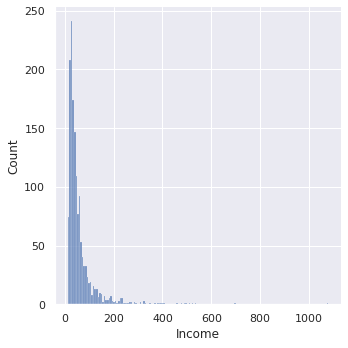

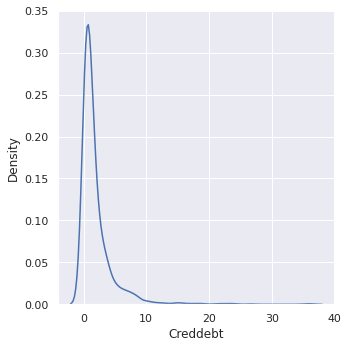

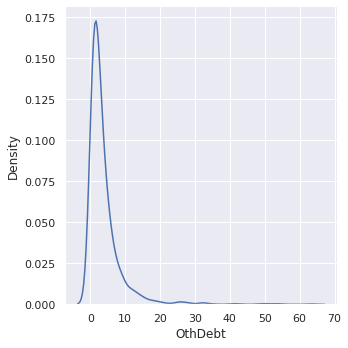

In [ ]:
sns.displot(bankloan_data['Income'], kind = 'hist')
sns.displot(bankloan_data['Creddebt'], kind = 'kde')
sns.displot(bankloan_data['OthDebt'], kind = 'kde')

In [ ]:
bankloan_data = bankloan_data.loc[(bankloan_data['Income'] < 300) & (bankloan_data['Creddebt'] < 15) & (bankloan_data['OthDebt'] < 30)]

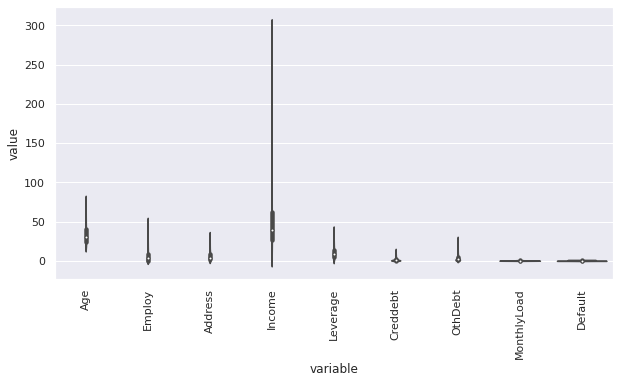

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(bankloan_data.iloc[:, np.r_[1,3:11]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

## Z-Score

In [ ]:
from scipy.stats import zscore

In [ ]:
# Identify the numerical columns
numeric_cols = bankloan_data.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['customer', 'Age', 'Employ', 'Address', 'Income', 'Leverage',
       'Creddebt', 'OthDebt', 'MonthlyLoad', 'Default'],
      dtype='object')

In [ ]:
# Remove the first and last one
numeric_cols = numeric_cols[1:-1]
bankloan_data.head()

,customer,Age,Education,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default
0,10012,28,Med,7,2.0,44.0,17.7,2.99,4.80,0.58,0
1,10017,64,Posg,34,17.0,116.0,14.7,5.05,12.00,0.27,0
2,10030,40,Bas,20,12.0,61.0,4.8,1.04,1.89,0.13,0
3,10039,30,Bas,11,3.0,27.0,34.5,1.75,7.56,1.62,0
4,10069,25,Bas,2,2.0,30.0,22.4,0.76,5.96,0.97,1


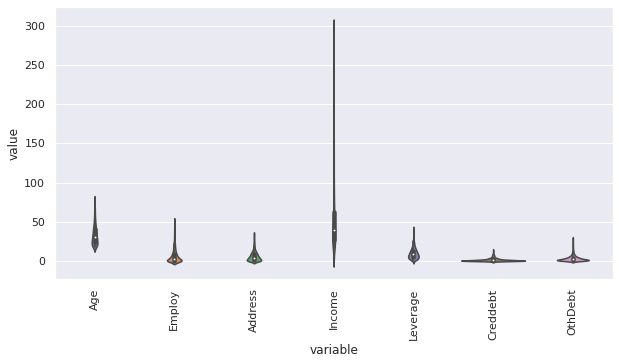

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(bankloan_data.iloc[:, np.r_[1,3:9]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

## Dummies

In [ ]:
#Education: Maximum education level the borrower reached.
#1: Complete primary.
#2: Completed Secondary.
#3: Incomplete Higher Ed.
#4: Complete Higher Ed.
#5: With postgraduate studies (complete MSc or PhD).


pd.crosstab(bankloan_data['Education'], bankloan_data['Default'])

Default,0,1
Education,,
Bas,180,64
Med,323,194
Posg,54,26
SupCom,166,132
SupInc,210,117


In [ ]:
bankloan_data.groupby('Education', as_index=False).agg({'Default': ["mean"]})

,Education,Default
,,mean
0,Bas,0.262295
1,Med,0.375242
2,Posg,0.325000
3,SupCom,0.442953
4,SupInc,0.357798


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
bankloan_data = pd.get_dummies(bankloan_data)
bankloan_data.describe()
bankloan_data.info()
bankloan_data2.describe()

,customer,Age,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default,Education_Bas,Education_Med,Education_Posg,Education_SupCom,Education_SupInc
count,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000
mean,257292.708731,33.654843,6.450205,6.078445,52.549113,9.874147,1.675498,3.387769,0.369714,0.363574,0.166439,0.352660,0.054570,0.203274,0.223056
std,139836.339003,12.717335,8.213568,5.846616,40.793369,6.576599,2.005519,3.663923,0.295177,0.481192,0.372602,0.477961,0.227217,0.402572,0.416438
min,10012.000000,18.000000,0.000000,0.000000,12.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98156.750000,24.000000,0.000000,2.000000,27.000000,4.900000,0.410000,1.080000,0.152500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,316020.000000,30.500000,3.000000,4.000000,39.000000,8.500000,0.950000,2.170000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,370670.750000,41.000000,9.000000,9.000000,62.000000,13.400000,2.097500,4.397500,0.500000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,453777.000000,77.000000,51.000000,34.000000,289.000000,40.700000,14.370000,28.940000,2.150000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer          1466 non-null   int64  
 1   Age               1466 non-null   int64  
 2   Employ            1466 non-null   int64  
 3   Address           1466 non-null   float64
 4   Income            1466 non-null   float64
 5   Leverage          1466 non-null   float64
 6   Creddebt          1466 non-null   float64
 7   OthDebt           1466 non-null   float64
 8   MonthlyLoad       1466 non-null   float64
 9   Default           1466 non-null   int64  
 10  Education_Bas     1466 non-null   uint8  
 11  Education_Med     1466 non-null   uint8  
 12  Education_Posg    1466 non-null   uint8  
 13  Education_SupCom  1466 non-null   uint8  
 14  Education_SupInc  1466 non-null   uint8  
dtypes: float64(6), int64(4), uint8(5)
memory usage: 133.1 KB


,customer,Age,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default
count,1500.000000,1500.000000,1500.000000,1499.000000,1499.000000,1499.000000,1499.000000,1489.000000,1500.000000,1500.000000
mean,257714.548000,34.174000,6.952000,6.309540,59.615077,677.046631,1.936197,3.872257,0.365447,0.365333
std,139555.147719,13.142306,8.977644,6.047563,67.144768,25828.218141,2.974485,5.343150,0.293937,0.481684
min,10012.000000,18.000000,0.000000,0.000000,12.000000,0.100000,0.000000,0.100000,0.000000,0.000000
25%,98638.750000,24.000000,0.000000,2.000000,27.000000,4.800000,0.420000,1.120000,0.150000,0.000000
50%,315991.500000,31.000000,4.000000,5.000000,40.000000,8.500000,0.990000,2.240000,0.290000,0.000000
75%,370701.500000,42.000000,10.000000,9.000000,64.000000,13.600000,2.200000,4.610000,0.500000,1.000000
max,453777.000000,79.000000,63.000000,34.000000,1079.000000,999999.000000,35.970000,63.470000,2.150000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


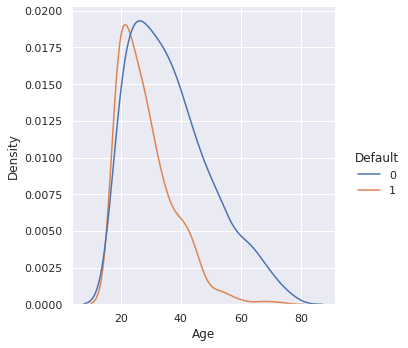

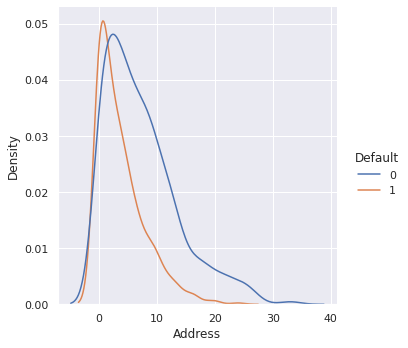

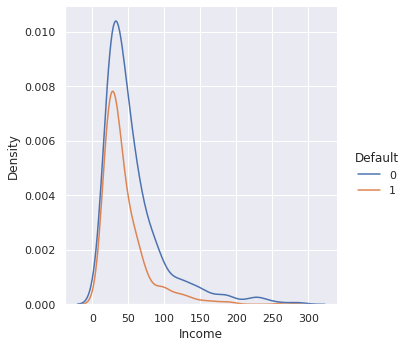

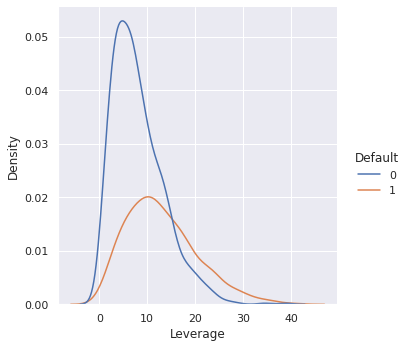

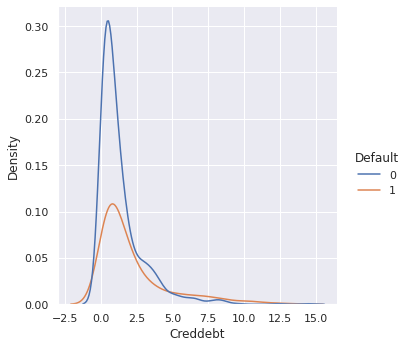

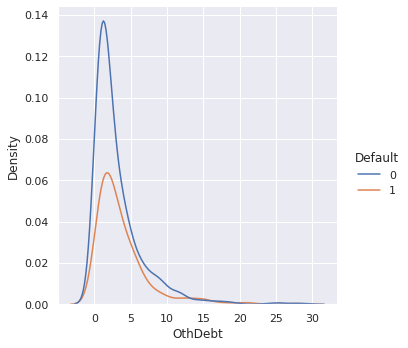

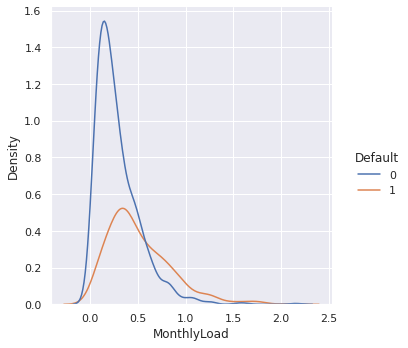

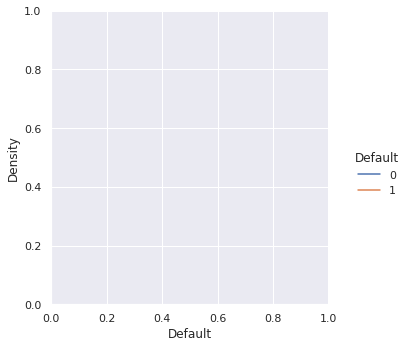

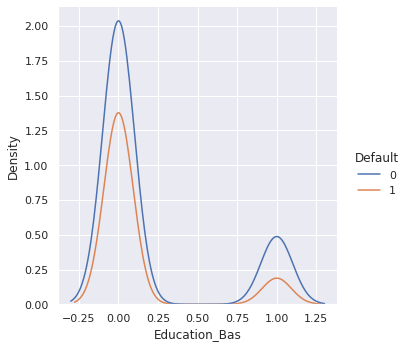

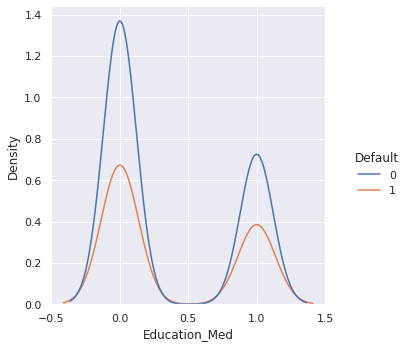

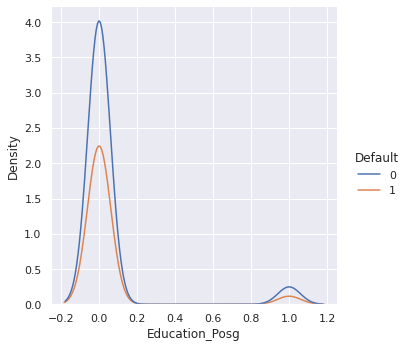

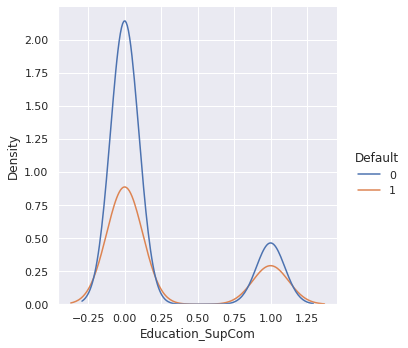

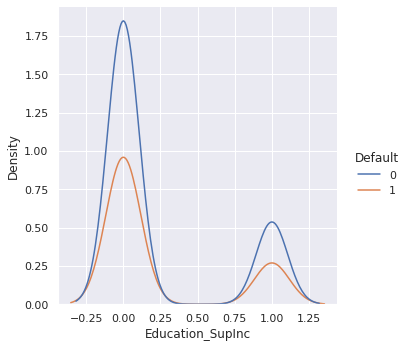

In [ ]:
sns.set(color_codes=True)

for col_id in bankloan_data.columns[np.r_[1,3:15]]:
    sns.displot(data = bankloan_data, x = col_id, hue = "Default", kind = 'kde')

## Kernell and Hexbins agian

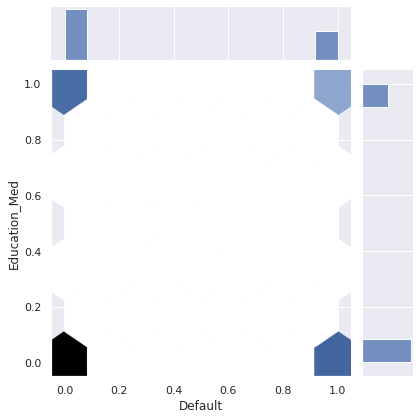

Default,0,1
Education_Med,,
0,610,339
1,323,194


In [ ]:
import scipy.stats as stats
sns.jointplot(data=bankloan_data, x="Default", y="Education_Med", kind="hex")
plt.show()
pd.crosstab(bankloan_data['Education_Med'], bankloan_data['Default'])

# WoE- scorecardpy

Weight of evidence (WOE) and Information value (IV) are simple, yet powerful techniques to perform variable transformation and selection. These concepts have huge connection with the logistic regression modeling technique. It is widely used in credit scoring to measure the separation of good vs bad customers.

The advantages of WOE transformation are

* Handles missing values
* Handles outliers
* The transformation is based on logarithmic value of distributions. This is aligned with the logistic regression output function
* No need for dummy variables
* By using proper binning technique, it can establish monotonic relationship (either increase or decrease) between the independent and dependent variable
* Also, IV value can be used to select variables quickly.

[WoE-info](https://sundarstyles89.medium.com/weight-of-evidence-and-information-value-using-python-6f05072e83eb)

[WoE git code sample](https://github.com/Sundar0989/WOE-and-IV/blob/master/WOE_IV.ipynb)

In [ ]:
!pip install scorecardpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 1.9 MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-py3-none-any.whl size=57843 sha256=a54cc1808fecd07349afbb0a5724e53becdfc8c05619215e11b6b15a3c8a72bb
  Stored in directory: /root/.cache/pip/wheels/9d/50/52/715367c478fd2e2317070ccf6539b2c29fc8168144cfbfaeac
Successfully built scorecardpy


In [ ]:
import pandas as pd
!gdown 'https://drive.google.com/uc?id=1-RiFAF4zU27N9MnoSYUlNuqFhR3VcuWs'
bankloan_data = pd.read_pickle('BankloanClean.pkl')
bankloan_data.describe()

Downloading...
From: https://drive.google.com/uc?id=1-RiFAF4zU27N9MnoSYUlNuqFhR3VcuWs
To: /content/BankloanClean.pkl
100% 135k/135k [00:00<00:00, 59.5MB/s]


,customer,Age,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default
count,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000
mean,257649.480188,34.003358,6.799866,6.233714,56.898590,9.904835,1.801370,3.664231,0.366850,0.361988
std,139646.983244,12.982437,8.765093,5.987928,55.062182,6.649132,2.340326,4.665854,0.294387,0.480737
min,10012.000000,18.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98410.000000,24.000000,0.000000,2.000000,27.000000,4.800000,0.420000,1.100000,0.150000,0.000000
50%,316013.000000,31.000000,4.000000,5.000000,39.000000,8.500000,0.980000,2.200000,0.290000,0.000000
75%,370695.000000,41.000000,10.000000,9.000000,63.000000,13.500000,2.170000,4.500000,0.500000,1.000000
max,453777.000000,79.000000,63.000000,34.000000,533.000000,40.700000,19.050000,52.650000,2.150000,1.000000


In [ ]:
bankloan_data.head()
bankloan_data.info()

,customer,Age,Education,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default
0,10012,28,Med,7,2.0,44.0,17.7,2.99,4.80,0.58,0
1,10017,64,Posg,34,17.0,116.0,14.7,5.05,12.00,0.27,0
2,10030,40,Bas,20,12.0,61.0,4.8,1.04,1.89,0.13,0
3,10039,30,Bas,11,3.0,27.0,34.5,1.75,7.56,1.62,0
4,10069,25,Bas,2,2.0,30.0,22.4,0.76,5.96,0.97,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer     1489 non-null   int64  
 1   Age          1489 non-null   int64  
 2   Education    1489 non-null   object 
 3   Employ       1489 non-null   int64  
 4   Address      1489 non-null   float64
 5   Income       1489 non-null   float64
 6   Leverage     1489 non-null   float64
 7   Creddebt     1489 non-null   float64
 8   OthDebt      1489 non-null   float64
 9   MonthlyLoad  1489 non-null   float64
 10  Default      1489 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 139.6+ KB


## Creating Features

In [ ]:
bankloan_data['OthDebtRatio'] = bankloan_data['OthDebt'] / bankloan_data['Income']
bankloan_data['CreddebtRatio'] = bankloan_data['Creddebt'] / bankloan_data['Income']
bankloan_data['LeverageRatio'] = bankloan_data['Leverage'] / bankloan_data['Income']

In [ ]:
bankloan_data.head()

,customer,Age,Education,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default,OthDebtRatio,CreddebtRatio,LeverageRatio
0,10012,28,Med,7,2.0,44.0,17.7,2.99,4.80,0.58,0,0.109091,0.067955,0.402273
1,10017,64,Posg,34,17.0,116.0,14.7,5.05,12.00,0.27,0,0.103448,0.043534,0.126724
2,10030,40,Bas,20,12.0,61.0,4.8,1.04,1.89,0.13,0,0.030984,0.017049,0.078689
3,10039,30,Bas,11,3.0,27.0,34.5,1.75,7.56,1.62,0,0.280000,0.064815,1.277778
4,10069,25,Bas,2,2.0,30.0,22.4,0.76,5.96,0.97,1,0.198667,0.025333,0.746667


## Binning

By using proper binning technique, it can establish monotonic relationship (either increase or decrease) between the independent and dependent variable

In [ ]:
import scorecardpy as sc
import numpy as np

In [ ]:
# Split in train and test BEFORE we apply WoE
# Use your Student ID as seed!

train, test = sc.split_df(bankloan_data.iloc[:,1:],
                          y = 'Default',
                          ratio = 0.7, seed = 20190227).values()

train.describe()
test.describe()

,Age,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default,OthDebtRatio,CreddebtRatio,LeverageRatio
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,34.146833,6.849328,6.289827,56.221689,9.797889,1.766612,3.602294,0.361238,0.361804,0.065745,0.032216,0.263413
std,13.121634,8.751854,6.055655,51.342681,6.589095,2.252177,4.429818,0.291971,0.480753,0.048982,0.029450,0.240221
min,18.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,2.000000,28.000000,4.700000,0.420000,1.072500,0.150000,0.000000,0.028521,0.011284,0.092357
50%,31.000000,4.000000,5.000000,39.000000,8.400000,0.980000,2.205000,0.290000,0.000000,0.053353,0.022739,0.196148
75%,41.750000,9.000000,9.000000,62.000000,13.400000,2.127500,4.560000,0.490000,1.000000,0.090714,0.044723,0.354176
max,77.000000,53.000000,33.000000,526.000000,38.800000,18.120000,52.650000,2.150000,1.000000,0.306400,0.242619,1.763636


,Age,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default,OthDebtRatio,CreddebtRatio,LeverageRatio
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,33.668904,6.684564,6.102908,58.476510,10.154139,1.882394,3.808613,0.379933,0.362416,0.068278,0.033246,0.278320
std,12.660184,8.804621,5.831580,62.919329,6.787943,2.534739,5.176891,0.299867,0.481237,0.049815,0.031745,0.247911
min,18.000000,0.000000,0.000000,12.000000,0.400000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.001501
25%,24.000000,0.000000,1.000000,26.500000,5.200000,0.420000,1.190000,0.160000,0.000000,0.032353,0.012094,0.095658
50%,31.000000,3.000000,5.000000,41.000000,8.800000,0.950000,2.190000,0.300000,0.000000,0.056851,0.023689,0.205556
75%,41.000000,10.000000,9.000000,65.500000,13.600000,2.310000,4.410000,0.510000,1.000000,0.090694,0.042740,0.384584
max,79.000000,63.000000,34.000000,533.000000,40.700000,19.050000,50.220000,1.790000,1.000000,0.261562,0.184167,1.505263


## IV

Information value is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :

IV = ∑ (% of non-events - % of events) * WOE

Information Value Variable Predictiveness:

Less than 0.02 Not useful for prediction
0.02 to 0.1 Weak predictive Power
0.1 to 0.3 Medium predictive Power
0.3 to 0.5 Strong predictive Power
More than 0.5 Suspicious Predictive Power

In [ ]:
train.head()

,Age,Education,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default,OthDebtRatio,CreddebtRatio,LeverageRatio
0,28,Med,7,2.0,44.0,17.7,2.99,4.80,0.58,0,0.109091,0.067955,0.402273
1,64,Posg,34,17.0,116.0,14.7,5.05,12.00,0.27,0,0.103448,0.043534,0.126724
3,30,Bas,11,3.0,27.0,34.5,1.75,7.56,1.62,0,0.280000,0.064815,1.277778
4,25,Bas,2,2.0,30.0,22.4,0.76,5.96,0.97,1,0.198667,0.025333,0.746667
5,35,Bas,2,9.0,38.0,10.9,1.46,2.68,0.40,1,0.070526,0.038421,0.286842


In [ ]:
bins = sc.woebin(train, y = 'Default',
                 min_perc_fine_bin=0.05, # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.1, # Minimum information value
                 max_num_bin=8, # Maximum number of bins
                 method='tree')

[INFO] creating woe binning ...


{'Creddebt': <Figure size 432x288 with 2 Axes>,
 'LeverageRatio': <Figure size 432x288 with 2 Axes>,
 'Age': <Figure size 432x288 with 2 Axes>,
 'Income': <Figure size 432x288 with 2 Axes>,
 'Leverage': <Figure size 432x288 with 2 Axes>,
 'Employ': <Figure size 432x288 with 2 Axes>,
 'CreddebtRatio': <Figure size 432x288 with 2 Axes>,
 'Education': <Figure size 432x288 with 2 Axes>,
 'MonthlyLoad': <Figure size 432x288 with 2 Axes>,
 'OthDebt': <Figure size 432x288 with 2 Axes>,
 'Address': <Figure size 432x288 with 2 Axes>,
 'OthDebtRatio': <Figure size 432x288 with 2 Axes>}

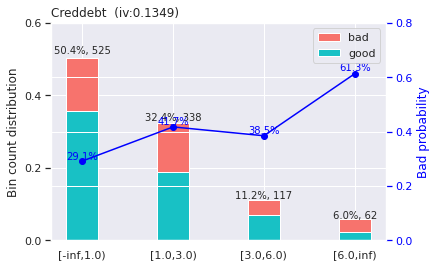

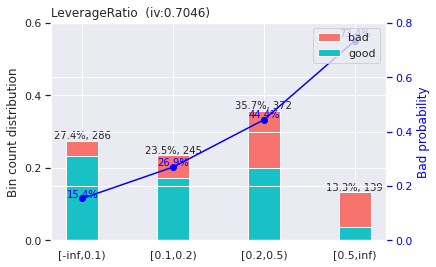

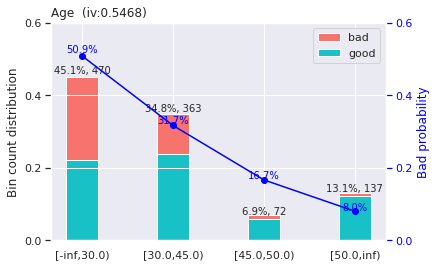

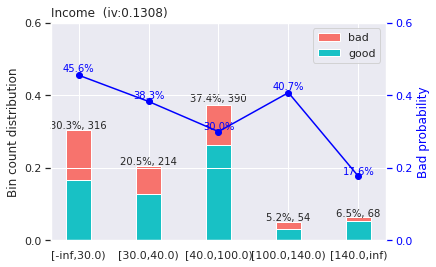

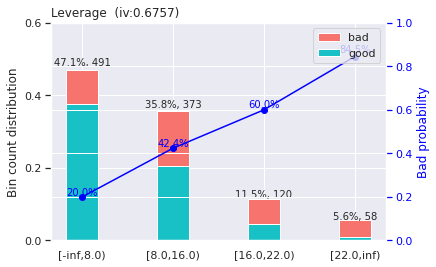

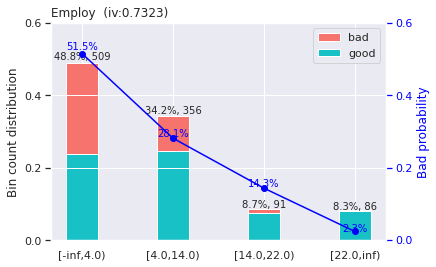

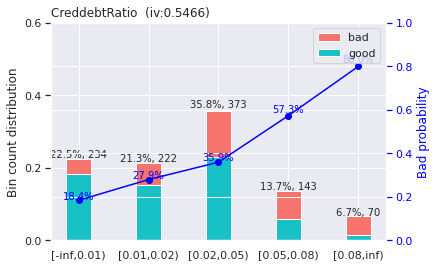

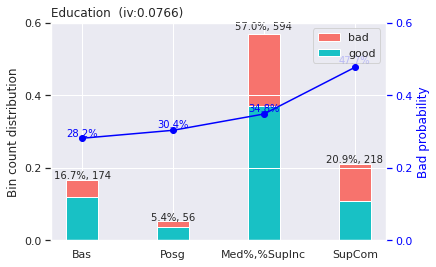

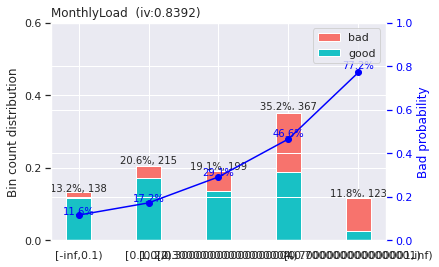

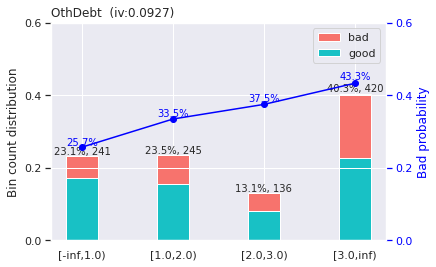

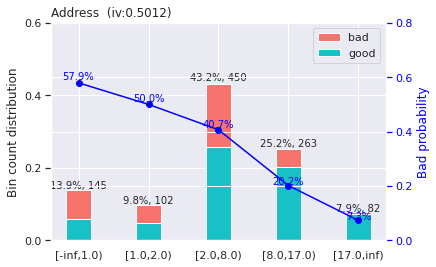

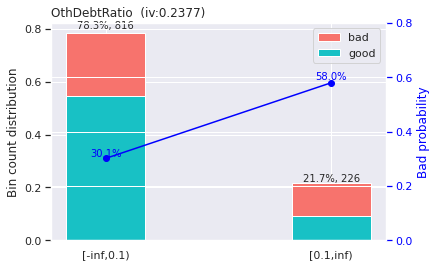

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sc.woebin_plot(bins)

In [ ]:
bins

{'Creddebt':    variable         bin  count  count_distr  good  bad   badprob       woe  \
 0  Creddebt  [-inf,1.0)    525     0.503839   372  153  0.291429 -0.320914   
 1  Creddebt   [1.0,3.0)    338     0.324376   197  141  0.417160  0.233098   
 2  Creddebt   [3.0,6.0)    117     0.112284    72   45  0.384615  0.097538   
 3  Creddebt   [6.0,inf)     62     0.059501    24   38  0.612903  1.027074   
 
      bin_iv  total_iv breaks  is_special_values  
 0  0.049281  0.134947    1.0              False  
 1  0.018127  0.134947    3.0              False  
 2  0.001082  0.134947    6.0              False  
 3  0.066457  0.134947    inf              False  ,
 'LeverageRatio':         variable         bin  count  count_distr  good  bad   badprob  \
 0  LeverageRatio  [-inf,0.1)    286     0.274472   242   44  0.153846   
 1  LeverageRatio   [0.1,0.2)    245     0.235125   179   66  0.269388   
 2  LeverageRatio   [0.2,0.5)    372     0.357006   207  165  0.443548   
 3  LeverageRatio   [0

## Adjusting bins criteria breaks

-------- 1/12 Creddebt --------
>>> dt[Creddebt].describe(): 
count    1042.000000
mean        1.766612
std         2.252177
min         0.000000
25%         0.420000
50%         0.980000
75%         2.127500
max        18.120000
Name: Creddebt, dtype: float64 



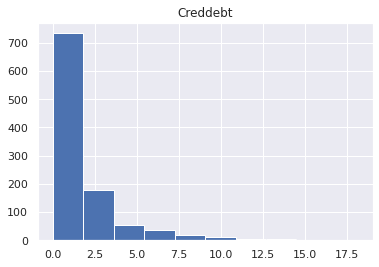

>>> Current breaks:
1.0,3.0,6.0 



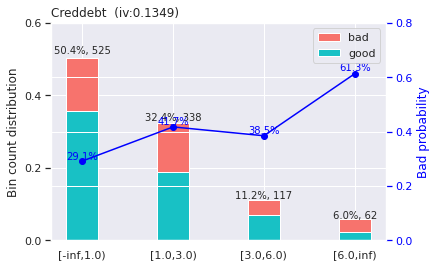

>>> Adjust breaks for (1/12) Creddebt?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/12 Income --------
>>> dt[Income].describe(): 
count    1042.000000
mean       56.221689
std        51.342681
min        12.000000
25%        28.000000
50%        39.000000
75%        62.000000
max       526.000000
Name: Income, dtype: float64 



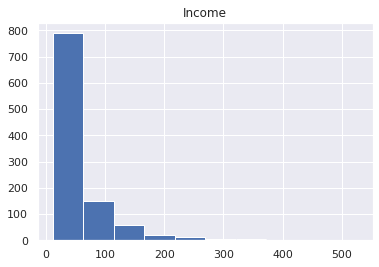

>>> Current breaks:
30.0,40.0,100.0,140.0 



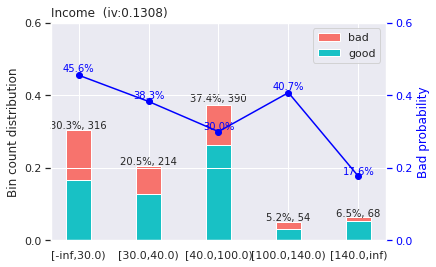

>>> Adjust breaks for (2/12) Income?
1: next 
2: yes 
3: back
Selection: 1
-------- 3/12 Education --------
>>> dt[Education].describe(): 
count     1042
unique       5
top        Med
freq       358
Name: Education, dtype: object 

>>> dt[Education].value_counts(): 
Med       358
SupInc    236
SupCom    218
Bas       174
Posg       56
Name: Education, dtype: int64 

>>> Current breaks:
'Bas','Posg','Med%,%SupInc','SupCom' 



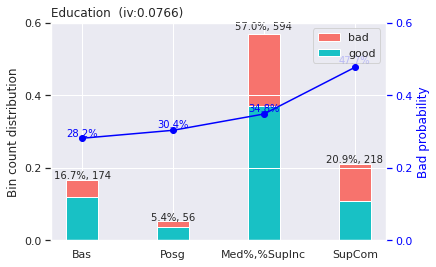

>>> Adjust breaks for (3/12) Education?
1: next 
2: yes 
3: back
Selection: 1
-------- 4/12 OthDebtRatio --------
>>> dt[OthDebtRatio].describe(): 
count    1042.000000
mean        0.065745
std         0.048982
min         0.000000
25%         0.028521
50%         0.053353
75%         0.090714
max         0.306400
Name: OthDebtRatio, dtype: float64 



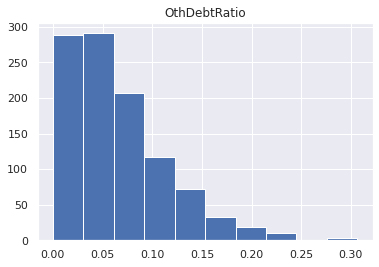

>>> Current breaks:
0.1 



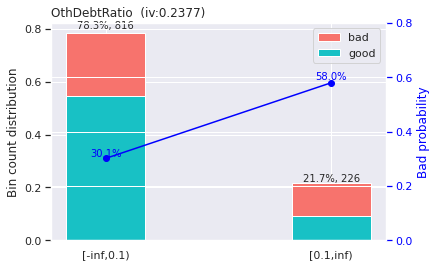

>>> Adjust breaks for (4/12) OthDebtRatio?
1: next 
2: yes 
3: back
Selection: 1
-------- 5/12 Address --------
>>> dt[Address].describe(): 
count    1042.000000
mean        6.289827
std         6.055655
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        33.000000
Name: Address, dtype: float64 



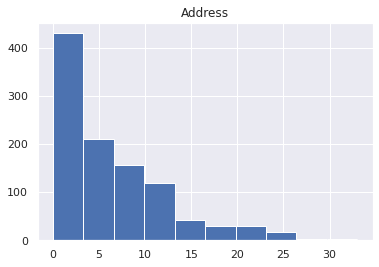

>>> Current breaks:
1.0,2.0,8.0,17.0 



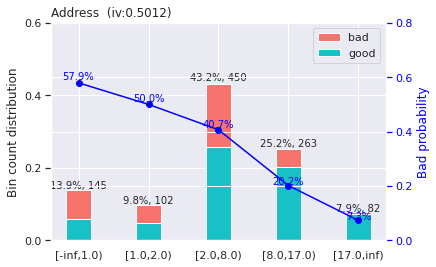

>>> Adjust breaks for (5/12) Address?
1: next 
2: yes 
3: back
Selection: 1
-------- 6/12 CreddebtRatio --------
>>> dt[CreddebtRatio].describe(): 
count    1042.000000
mean        0.032216
std         0.029450
min         0.000000
25%         0.011284
50%         0.022739
75%         0.044723
max         0.242619
Name: CreddebtRatio, dtype: float64 



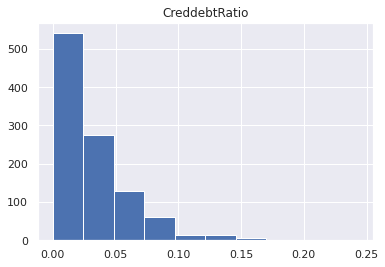

>>> Current breaks:
0.01,0.02,0.05,0.08 



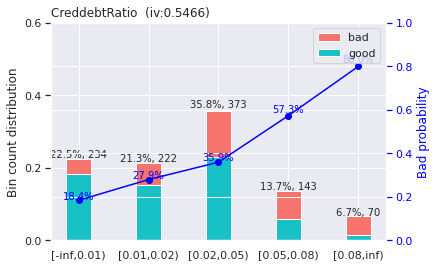

>>> Adjust breaks for (6/12) CreddebtRatio?
1: next 
2: yes 
3: back
Selection: 1
-------- 7/12 OthDebt --------
>>> dt[OthDebt].describe(): 
count    1042.000000
mean        3.602294
std         4.429818
min         0.000000
25%         1.072500
50%         2.205000
75%         4.560000
max        52.650000
Name: OthDebt, dtype: float64 



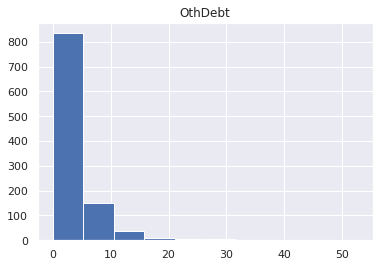

>>> Current breaks:
1.0,2.0,3.0 



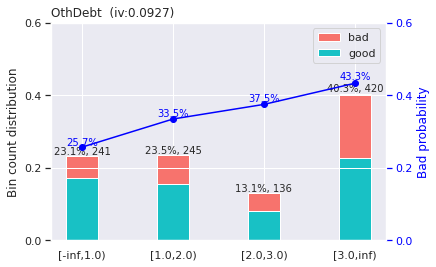

>>> Adjust breaks for (7/12) OthDebt?
1: next 
2: yes 
3: back
Selection: 1
-------- 8/12 LeverageRatio --------
>>> dt[LeverageRatio].describe(): 
count    1042.000000
mean        0.263413
std         0.240221
min         0.000000
25%         0.092357
50%         0.196148
75%         0.354176
max         1.763636
Name: LeverageRatio, dtype: float64 



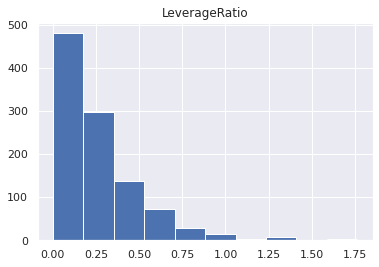

>>> Current breaks:
0.1,0.2,0.5 



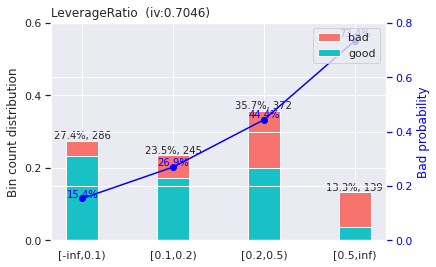

>>> Adjust breaks for (8/12) LeverageRatio?
1: next 
2: yes 
3: back
Selection: 1
-------- 9/12 Leverage --------
>>> dt[Leverage].describe(): 
count    1042.000000
mean        9.797889
std         6.589095
min         0.000000
25%         4.700000
50%         8.400000
75%        13.400000
max        38.800000
Name: Leverage, dtype: float64 



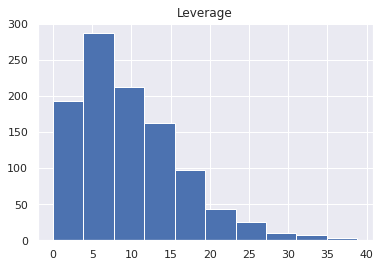

>>> Current breaks:
8.0,16.0,22.0 



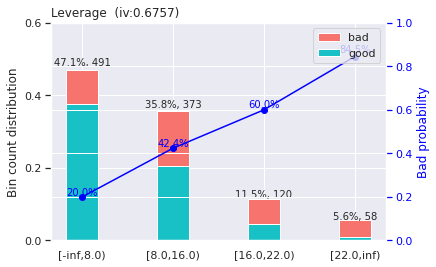

>>> Adjust breaks for (9/12) Leverage?
1: next 
2: yes 
3: back
Selection: 1
-------- 10/12 Employ --------
>>> dt[Employ].describe(): 
count    1042.000000
mean        6.849328
std         8.751854
min         0.000000
25%         0.000000
50%         4.000000
75%         9.000000
max        53.000000
Name: Employ, dtype: float64 



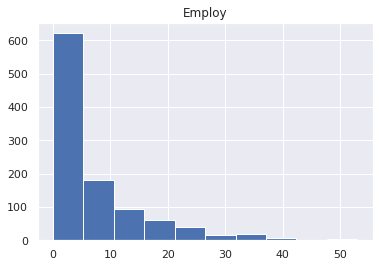

>>> Current breaks:
4.0,14.0,22.0 



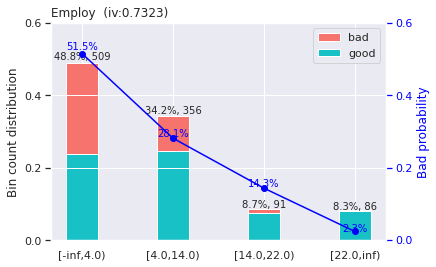

>>> Adjust breaks for (10/12) Employ?
1: next 
2: yes 
3: back
Selection: 1
-------- 11/12 MonthlyLoad --------
>>> dt[MonthlyLoad].describe(): 
count    1042.000000
mean        0.361238
std         0.291971
min         0.000000
25%         0.150000
50%         0.290000
75%         0.490000
max         2.150000
Name: MonthlyLoad, dtype: float64 



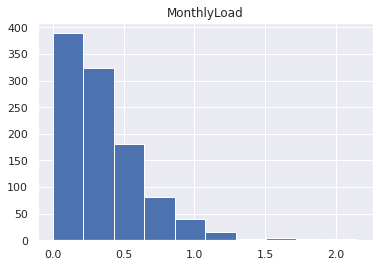

>>> Current breaks:
0.1,0.2,0.30000000000000004,0.7000000000000001 



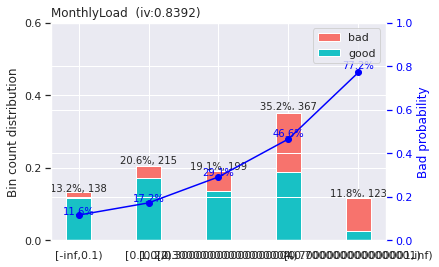

>>> Adjust breaks for (11/12) MonthlyLoad?
1: next 
2: yes 
3: back
Selection: 1
-------- 12/12 Age --------
>>> dt[Age].describe(): 
count    1042.000000
mean       34.146833
std        13.121634
min        18.000000
25%        24.000000
50%        31.000000
75%        41.750000
max        77.000000
Name: Age, dtype: float64 



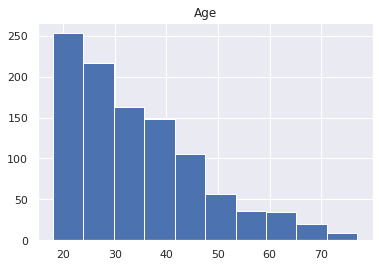

>>> Current breaks:
30.0,45.0,50.0 



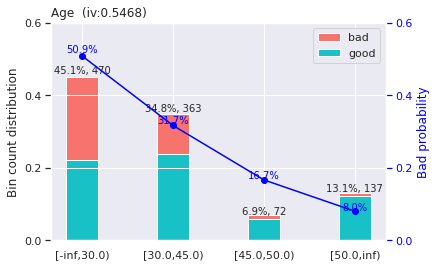

>>> Adjust breaks for (12/12) Age?
1: next 
2: yes 
3: back
Selection: 1


In [ ]:
breaks_adj = sc.woebin_adj(train, "Default", bins, adj_all_var = True)

In [ ]:
bins_adj = sc.woebin(train, y="Default", breaks_list=breaks_adj) # Apply new cuts
train_woe = sc.woebin_ply(train, bins_adj) # Calculate WoE dataset (train)
test_woe = sc.woebin_ply(test, bins_adj) # Calculate WoE dataset (test)

NameError: ignored

In [ ]:
train_woe.head(15)
test_woe.head(15)

NameError: ignored

In [ ]:
bins.get('MonthlyLoad')
breaks_adj

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,MonthlyLoad,"[-inf,0.1)",138,0.132438,122,16,0.115942,-1.463890,0.206435,0.839193,0.1,False
1,MonthlyLoad,"[0.1,0.2)",215,0.206334,178,37,0.172093,-1.003324,0.170089,0.839193,0.2,False
2,MonthlyLoad,"[0.2,0.30000000000000004)",199,0.190979,141,58,0.291457,-0.320775,0.018664,0.839193,0.30000000000000004,False
3,MonthlyLoad,"[0.30000000000000004,0.7000000000000001)",367,0.352207,196,171,0.465940,0.431091,0.068476,0.839193,0.7000000000000001,False
4,MonthlyLoad,"[0.7000000000000001,inf)",123,0.118042,28,95,0.772358,1.789214,0.375528,0.839193,inf,False


"{'Address': [1.0,2.0,8.0,17.0], 'Age': [30.0,45.0,50.0], 'Creddebt': [1.0,3.0,6.0], 'CreddebtRatio': [0.01,0.02,0.05,0.08], 'Education': ['Bas','Posg','Med%,%SupInc','SupCom'], 'Employ': [4.0,14.0,22.0], 'Income': [30.0,40.0,100.0,140.0], 'Leverage': [8.0,16.0,22.0], 'LeverageRatio': [0.1,0.2,0.5], 'MonthlyLoad': [0.1,0.2,0.30000000000000004,0.7000000000000001], 'OthDebt': [1.0,2.0,3.0], 'OthDebtRatio': [0.1]}"

In [ ]:
sc.iv(train_woe, 'Default')

,variable,info_value
11,MonthlyLoad_woe,0.839193
8,Employ_woe,0.732278
7,LeverageRatio_woe,0.704582
1,Leverage_woe,0.675729
5,Age_woe,0.546779
10,CreddebtRatio_woe,0.546622
9,Address_woe,0.501228
6,OthDebtRatio_woe,0.237695
4,Creddebt_woe,0.134947
3,Income_woe,0.130776


In [ ]:
# Check column order.
train_woe.columns

Index(['Default', 'Creddebt_woe', 'Income_woe', 'Education_woe',
       'OthDebtRatio_woe', 'Address_woe', 'CreddebtRatio_woe', 'OthDebt_woe',
       'LeverageRatio_woe', 'Leverage_woe', 'Employ_woe', 'MonthlyLoad_woe',
       'Age_woe'],
      dtype='object')

In [ ]:
# Create range of accepted variables
accepted_range = np.r_[0:12] # Note the last in each subrange is not used
train_woe = train_woe.iloc[:, accepted_range]
test_woe = test_woe.iloc[:, accepted_range]
train_woe.head(6)
test_woe.head(6)

,Default,Creddebt_woe,Income_woe,Education_woe,OthDebtRatio_woe,Address_woe,CreddebtRatio_woe,OthDebt_woe,LeverageRatio_woe,Leverage_woe,Employ_woe,MonthlyLoad_woe
0,0,0.233098,-0.279756,-0.058164,0.888862,0.189779,0.863387,0.299278,0.340769,0.973007,-0.372465,0.431091
1,0,0.097538,0.192848,-0.262806,0.888862,-1.971432,-0.011082,0.299278,-0.430189,0.259499,-3.170128,-0.320775
3,0,0.233098,0.389861,-0.368952,0.888862,0.189779,0.863387,0.299278,1.581597,2.262138,-0.372465,1.789214
4,1,-0.320914,0.091459,-0.368952,0.888862,0.189779,-0.011082,0.299278,1.581597,2.262138,0.626498,1.789214
5,1,0.233098,0.091459,-0.368952,-0.272763,-0.809274,-0.011082,0.056716,0.340769,0.259499,0.626498,0.431091
6,1,-0.320914,0.091459,-0.058164,-0.272763,0.189779,-0.011082,0.299278,0.340769,0.259499,0.626498,0.431091


,Default,Creddebt_woe,Income_woe,Education_woe,OthDebtRatio_woe,Address_woe,CreddebtRatio_woe,OthDebt_woe,LeverageRatio_woe,Leverage_woe,Employ_woe,MonthlyLoad_woe
2,0,0.233098,-0.279756,-0.368952,-0.272763,-0.809274,-0.380498,-0.119489,-1.137206,-0.821300,-1.224218,-1.003324
9,0,-0.320914,0.389861,-0.058164,-0.272763,0.887485,-0.380498,-0.492710,-0.430189,-0.821300,0.626498,-0.320775
19,0,0.233098,0.192848,-0.058164,-0.272763,-1.971432,-0.011082,0.299278,-1.137206,0.259499,-3.170128,-1.003324
20,1,0.233098,-0.279756,-0.058164,-0.272763,0.567542,-0.011082,-0.119489,-0.430189,-0.821300,0.626498,-0.320775
21,0,-0.320914,0.091459,-0.368952,-0.272763,0.189779,-0.011082,0.056716,0.340769,0.259499,-0.372465,0.431091
24,0,-0.320914,-0.279756,-0.058164,-0.272763,-0.809274,-0.380498,-0.119489,-1.137206,-0.821300,-1.224218,-1.463890


## Download Results To C drive

In [ ]:
train_woe.to_csv("train_woe.csv", index = False)
test_woe.to_csv("test_woe.csv", index = False)
bankloan_data.to_pickle('BankloanCleanNewVars.pkl')
!ls # Linux commands to check what files are in the computer.

BankloanCleanNewVars.pkl  Bankloan.csv	test_woe.csv
BankloanClean.pkl	  sample_data	train_woe.csv


In [ ]:
from google.colab import files
files.download("train_woe.csv")
files.download("test_woe.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modeling: scikit-learn package

Logistic Regression and Scorecards

In [ ]:
# Import the csv files from last week.
!gdown 'https://drive.google.com/uc?id=1LWRFLpJtTopAlRqTuUd9XZvGB6CoHa2z'
!gdown 'https://drive.google.com/uc?id=1IvY78EGu-eizec_9agJUsQWDLT-wmSHF'
!gdown 'https://drive.google.com/uc?id=1aDraDSR2OQbIMjIY07s-rD5cel2x_iS-'

Downloading...
From: https://drive.google.com/uc?id=1LWRFLpJtTopAlRqTuUd9XZvGB6CoHa2z
To: /content/test_woe.csv
100% 80.6k/80.6k [00:00<00:00, 48.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IvY78EGu-eizec_9agJUsQWDLT-wmSHF
To: /content/train_woe.csv
100% 188k/188k [00:00<00:00, 76.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aDraDSR2OQbIMjIY07s-rD5cel2x_iS-
To: /content/BankloanCleanNewVars.pkl
100% 144k/144k [00:00<00:00, 56.8MB/s]


In [ ]:
!ls

BankloanCleanNewVars.pkl  Bankloan.csv	test_woe.csv
BankloanClean.pkl	  sample_data	train_woe.csv


In [ ]:
!pip install scorecardpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Package loading
import pandas as pd
import numpy as np
import scorecardpy as sc

In [ ]:
# Import the files as Pandas datasets
bankloan_train_WoE = pd.read_csv('train_woe.csv')
bankloan_test_WoE = pd.read_csv('test_woe.csv')
bankloan_data = pd.read_pickle('BankloanCleanNewVars.pkl')

In [ ]:
bankloan_train_WoE.head()
bankloan_test_WoE.head()
bankloan_data.head()


,Default,Leverage_woe,OthDebt_woe,Creddebt_woe,Age_woe,Employ_woe,OthDebtRatio_woe,MonthlyLoad_woe,Address_woe,Income_woe
0,0,0.973007,0.299278,0.198577,0.601588,-0.372465,0.888862,0.431091,0.189779,-0.179673
1,0,0.259499,0.299278,0.198577,-1.870845,-3.170128,0.888862,-0.320775,-1.971432,-0.342276
2,0,2.262138,0.299278,0.198577,-0.200955,-0.372465,0.888862,1.789214,0.189779,0.389861
3,1,2.262138,0.299278,-0.320914,0.601588,0.626498,0.888862,1.789214,0.189779,0.091459
4,1,0.259499,0.056716,0.198577,-0.200955,0.626498,-0.272763,0.431091,-0.809274,0.091459


,Default,Leverage_woe,OthDebt_woe,Creddebt_woe,Age_woe,Employ_woe,OthDebtRatio_woe,MonthlyLoad_woe,Address_woe,Income_woe
0,0,-0.821300,-0.119489,0.198577,-0.200955,-1.224218,-0.272763,-1.003324,-0.809274,-0.179673
1,0,-0.821300,-0.492710,-0.320914,0.601588,0.626498,-0.272763,-0.320775,0.887485,0.389861
2,0,0.259499,0.299278,0.198577,-1.870845,-3.170128,-0.272763,-1.003324,-1.971432,-0.342276
3,1,-0.821300,-0.119489,0.198577,0.601588,0.626498,-0.272763,-0.320775,0.567542,-0.179673
4,0,0.259499,0.056716,-0.320914,0.601588,-0.372465,-0.272763,0.431091,0.189779,0.091459


,customer,Age,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,OthDebtRatio,Default
0,10012,28,7,2.0,44.0,17.7,2.99,4.80,0.58,0.109091,0
1,10017,64,34,17.0,116.0,14.7,5.05,12.00,0.27,0.103448,0
2,10030,40,20,12.0,61.0,4.8,1.04,1.89,0.13,0.030984,0
3,10039,30,11,3.0,27.0,34.5,1.75,7.56,1.62,0.280000,0
4,10069,25,2,2.0,30.0,22.4,0.76,5.96,0.97,0.198667,1


## Training and Testing Split

In [ ]:
# Eliminate unused variables
# bankloan_data.drop(columns=['Education'], inplace = True)

# Same train-test split as before (because of seed!)
bankloan_train_noWoE, bankloan_test_noWoE = sc.split_df(bankloan_data.iloc[:, 1:],
                                                        y = 'Default',
                                                        ratio = 0.7,
                                                        seed = 20190227).values()

# Give breaks for WoE
breaks_adj = {'Address': [1.0,2.0,8.0,17.0],
              'Age': [30.0,45.0,50.0],
              'Creddebt': [1.0, 6.0],
              'Employ': [4.0,14.0,22.0],
              'Income': [30.0,40.0,80.0,140.0],
              'Leverage': [8.0,16.0,22.0],
              'MonthlyLoad': [0.1,0.2,0.30000000000000004,0.7000000000000001],
              'OthDebt': [1.0,2.0,3.0],
              'OthDebtRatio': [0.1]
              }

# Apply breaks.
bins_adj = sc.woebin(bankloan_train_noWoE, y="Default",
                     breaks_list=breaks_adj)


[INFO] creating woe binning ...


## Correlation

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

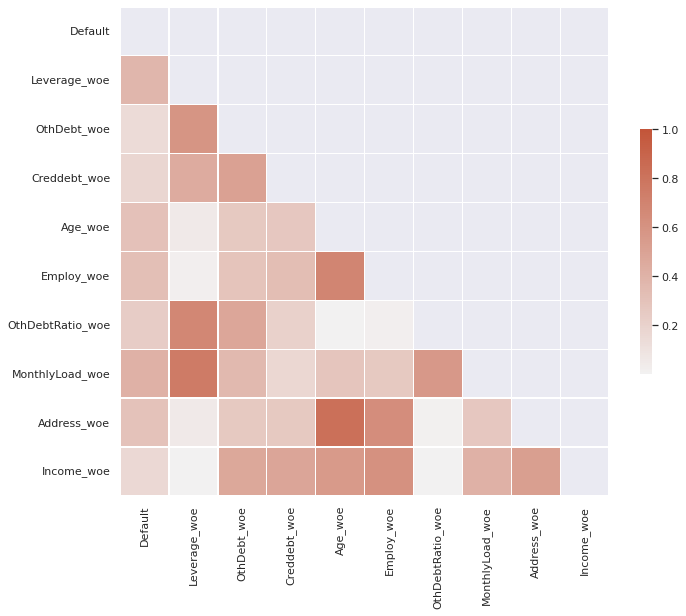

In [ ]:
# Compute the correlation matrix
corr = bankloan_train_WoE.corr()
corr = np.abs(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
corr

,Default,Leverage_woe,OthDebt_woe,Creddebt_woe,Age_woe,Employ_woe,OthDebtRatio_woe,MonthlyLoad_woe,Address_woe,Income_woe
Default,1.000000,0.379344,0.143872,0.176625,0.314282,0.326226,0.238581,0.414889,0.306337,0.162038
Leverage_woe,0.379344,1.000000,0.589260,0.450208,0.056701,0.020186,0.680059,0.753355,0.052842,0.005617
OthDebt_woe,0.143872,0.589260,1.000000,0.510767,0.261427,0.297007,0.478222,0.368723,0.261946,0.474394
Creddebt_woe,0.176625,0.450208,0.510767,1.000000,0.269690,0.335131,0.210360,0.171100,0.261197,0.490309
Age_woe,0.314282,0.056701,0.261427,0.269690,1.000000,0.690309,0.002593,0.285483,0.825427,0.557150
Employ_woe,0.326226,0.020186,0.297007,0.335131,0.690309,1.000000,0.019059,0.262808,0.639274,0.610408
OthDebtRatio_woe,0.238581,0.680059,0.478222,0.210360,0.002593,0.019059,1.000000,0.565728,0.013982,0.006787
MonthlyLoad_woe,0.414889,0.753355,0.368723,0.171100,0.285483,0.262808,0.565728,1.000000,0.272644,0.412215
Address_woe,0.306337,0.052842,0.261946,0.261197,0.825427,0.639274,0.013982,0.272644,1.000000,0.531033
Income_woe,0.162038,0.005617,0.474394,0.490309,0.557150,0.610408,0.006787,0.412215,0.531033,1.000000


In [ ]:
# Compute the correlation matrix
corr = bankloan_train_WoE.corr()
corr = np.abs(corr)
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False,  True,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
         True]])

##  linear_model subpackage

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

bankloan_logreg = LogisticRegressionCV(penalty='elasticnet', # Type of penalization l1 = lasso, l2 = ridge, elasticnet
                                     Cs = 10,        # How many parameters to try. Can also be a vector with parameters to try.
                                     tol=0.000001, # Tolerance for parameters
                                     cv = 3,     # How many CV folds to try. 3 or 5 should be enough.
                                     fit_intercept=True, # Use constant?
                                     class_weight='balanced', # Weights, see below
                                     random_state=20190301, # Random seed
                                     max_iter=100, # Maximum iterations
                                     verbose=1, # Show process. 1 is yes.
                                     solver = 'saga', # How to optimize.
                                     n_jobs = 2,      # Processes to use. Set to number of physical cores.
                                     refit = True,     # If to retrain with the best parameter and all data after finishing.
                                     l1_ratios = np.arange(0, 1, 0.1), # The LASSO / Ridge ratios.
                                    )

In [ ]:
bankloan_train_WoE.head()

,Default,Leverage_woe,OthDebt_woe,Creddebt_woe,Age_woe,Employ_woe,OthDebtRatio_woe,MonthlyLoad_woe,Address_woe,Income_woe
0,0,0.973007,0.299278,0.198577,0.601588,-0.372465,0.888862,0.431091,0.189779,-0.179673
1,0,0.259499,0.299278,0.198577,-1.870845,-3.170128,0.888862,-0.320775,-1.971432,-0.342276
2,0,2.262138,0.299278,0.198577,-0.200955,-0.372465,0.888862,1.789214,0.189779,0.389861
3,1,2.262138,0.299278,-0.320914,0.601588,0.626498,0.888862,1.789214,0.189779,0.091459
4,1,0.259499,0.056716,0.198577,-0.200955,0.626498,-0.272763,0.431091,-0.809274,0.091459


## Training

In [ ]:
bankloan_logreg.fit(X = bankloan_train_WoE.iloc[:, 1:], # All rows and from the second var to end
                    y = bankloan_train_WoE['Default'] # The target
                   )

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...rescaling...

rescaling...
rescaling...
rescaling...rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...rescaling...

rescaling...
rescaling...
convergence after 1 epochs took 0 seconds
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling

[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    2.9s finished


LogisticRegressionCV(class_weight='balanced', cv=3,
                     l1_ratios=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                     n_jobs=2, penalty='elasticnet', random_state=20190301,
                     solver='saga', tol=1e-06, verbose=1)

In [ ]:
coef_df = pd.concat([pd.DataFrame({'column': bankloan_train_WoE.columns[1:]}),
                    pd.DataFrame(np.transpose(bankloan_logreg.coef_))],
                    axis = 1
                   )

coef_df

,column,0
0,Leverage_woe,0.434069
1,OthDebt_woe,0.000000
2,Creddebt_woe,1.534714
3,Age_woe,0.317596
4,Employ_woe,1.141445
5,OthDebtRatio_woe,0.023956
6,MonthlyLoad_woe,0.509265
7,Address_woe,0.441594
8,Income_woe,-0.701385


In [ ]:
bankloan_logreg.intercept_
print(bankloan_logreg.l1_ratio_)
print(bankloan_logreg.C_)

array([-0.03315189])

[0.3]
[0.35938137]


In [ ]:
pred_class_test = bankloan_logreg.predict(bankloan_test_WoE.iloc[:, 1:])
probs_test = bankloan_logreg.predict_proba(bankloan_test_WoE.iloc[:, 1:])
print(probs_test[0:5], pred_class_test[0:5])

[[0.90845677 0.09154323]
 [0.50685414 0.49314586]
 [0.99314874 0.00685126]
 [0.26346629 0.73653371]
 [0.60215379 0.39784621]] [0 0 0 1 0]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = bankloan_test_WoE['Default'], y_pred = pred_class_test)

array([[204,  81],
       [ 43, 119]])

## Scorecards

In [ ]:
bankloan_sc = sc.scorecard(bins_adj,         # bins from the WoE
                           bankloan_logreg,  # Trained logistic regression
                           bankloan_train_WoE.columns[1:], # The column names in the trained LR
                           points0=750, # Base points
                           odds0=0.01, # Base odds bads:goods
                           pdo=50
                           ) # PDO

bankloan_sc

{'Address':    variable         bin  points
 10  Address  [-inf,1.0)   -28.0
 11  Address   [1.0,2.0)   -18.0
 12  Address   [2.0,8.0)    -6.0
 13  Address  [8.0,17.0)    26.0
 14  Address  [17.0,inf)    63.0, 'Age':    variable          bin  points
 32      Age  [-inf,30.0)   -14.0
 33      Age  [30.0,45.0)     5.0
 34      Age  [45.0,50.0)    24.0
 35      Age   [50.0,inf)    43.0, 'Creddebt':    variable         bin  points
 0  Creddebt  [-inf,1.0)    36.0
 1  Creddebt   [1.0,6.0)   -22.0
 2  Creddebt   [6.0,inf)  -114.0, 'Employ':    variable          bin  points
 23   Employ   [-inf,4.0)   -52.0
 24   Employ   [4.0,14.0)    31.0
 25   Employ  [14.0,22.0)   101.0
 26   Employ   [22.0,inf)   261.0, 'Income':   variable           bin  points
 3   Income   [-inf,30.0)    20.0
 4   Income   [30.0,40.0)     5.0
 5   Income   [40.0,80.0)    -9.0
 6   Income  [80.0,140.0)   -17.0
 7   Income   [140.0,inf)   -49.0, 'Leverage':     variable          bin  points
 19  Leverage   [-inf,8.0)   

In [ ]:
# Applying the credit score. Applies over the original data!
train_score = sc.scorecard_ply(bankloan_train_noWoE, bankloan_sc,
                               print_step=0)
test_score = sc.scorecard_ply(bankloan_test_noWoE, bankloan_sc,
                               print_step=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
train_score.describe()

,score
count,1042.000000
mean,447.738964
std,136.641263
min,74.000000
25%,358.000000
50%,438.000000
75%,516.000000
max,894.000000


# Ensembles and Error Measures

In [ ]:
# Import the csv files from last week.
!gdown 'https://drive.google.com/uc?id=1LWRFLpJtTopAlRqTuUd9XZvGB6CoHa2z'
!gdown 'https://drive.google.com/uc?id=1IvY78EGu-eizec_9agJUsQWDLT-wmSHF'
!gdown 'https://drive.google.com/uc?id=1aDraDSR2OQbIMjIY07s-rD5cel2x_iS-'

Downloading...
From: https://drive.google.com/uc?id=1LWRFLpJtTopAlRqTuUd9XZvGB6CoHa2z
To: /content/test_woe.csv
100% 80.6k/80.6k [00:00<00:00, 68.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IvY78EGu-eizec_9agJUsQWDLT-wmSHF
To: /content/train_woe.csv
100% 188k/188k [00:00<00:00, 87.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aDraDSR2OQbIMjIY07s-rD5cel2x_iS-
To: /content/BankloanCleanNewVars.pkl
100% 144k/144k [00:00<00:00, 75.1MB/s]


In [ ]:
!pip install scorecardpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Package loading
import pandas as pd
import numpy as np
import scorecardpy as sc

In [ ]:
# Import the files as Pandas datasets
bankloan_train_WoE = pd.read_csv('train_woe.csv')
bankloan_test_WoE = pd.read_csv('test_woe.csv')
bankloan_data = pd.read_pickle('BankloanCleanNewVars.pkl')

# Eliminate unused variables
bankloan_train_WoE.drop(columns=['OthDebt_woe'], inplace = True)
bankloan_test_WoE.drop(columns=['OthDebt_woe'], inplace = True)

# Same train-test split as before (because of seed!)
bankloan_train_noWoE, bankloan_test_noWoE = sc.split_df(bankloan_data.iloc[:, 1:],
                                                        y = 'Default',
                                                        ratio = 0.7,
                                                        seed = 20190227).values()

# Give breaks for WoE
breaks_adj = {'Address': [1.0,2.0,8.0,17.0],
              'Age': [30.0,45.0,50.0],
              'Creddebt': [1.0, 6.0],
              'Employ': [4.0,14.0,22.0],
              'Income': [30.0,40.0,80.0,140.0],
              'Leverage': [8.0,16.0,22.0],
              'MonthlyLoad': [0.1,0.2,0.30000000000000004,0.7000000000000001],
              'OthDebtRatio': [0.1]
              }

# Apply breaks.
bins_adj = sc.woebin(bankloan_train_noWoE, y="Default",
                     breaks_list=breaks_adj)

[INFO] creating woe binning ...


In [ ]:
# Train logistic regression
from sklearn.linear_model import LogisticRegressionCV

bankloan_logreg = LogisticRegressionCV(penalty='elasticnet', # Type of penalization l1 = lasso, l2 = ridge
                                     Cs = 10,        # How many parameters to try. Can also be a vector with parameters to try.
                                     tol=0.0001, # Tolerance for parameters
                                     cv = 3,     # How many CV folds to try. 3 or 5 should be enough.
                                     fit_intercept=True, # Use constant?
                                     class_weight='balanced', # Weights, see below
                                     random_state=20190301, # Random seed
                                     max_iter=100, # Maximum iterations
                                     verbose=0, # Show process. 1 is yes.
                                     solver = 'saga', # How to optimize.
                                     n_jobs = 2,      # Processes to use. Set to number of physical cores.
                                     refit = True,     # If to retrain with the best parameter and all data after finishing.
                                     l1_ratios = np.arange(0, 1, 0.1)
                                    )

bankloan_logreg.fit(X = bankloan_train_WoE.iloc[:, 1:], # All rows and from the second var to end
                    y = bankloan_train_WoE['Default'] # The target
                   )

# Calculate scorecard
bankloan_sc = sc.scorecard(bins_adj, bankloan_logreg,
             bankloan_train_WoE.columns[1:], # The column names in the trained LR
             points0=750, # Base points
             odds0=0.01, # Base odds
             pdo=50) # PDO

# Applying the credit score. Applies over the original data!
train_score = sc.scorecard_ply(bankloan_train_noWoE, bankloan_sc,
                               print_step=0)
test_score = sc.scorecard_ply(bankloan_test_noWoE, bankloan_sc,
                               print_step=0)

LogisticRegressionCV(class_weight='balanced', cv=3,
                     l1_ratios=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                     n_jobs=2, penalty='elasticnet', random_state=20190301,
                     solver='saga')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


# Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Define the classifier
bankloan_rf = RandomForestClassifier(n_estimators=1000, # Number of trees to train
                       criterion='entropy', # How to train the trees. Also supports gini.
                       max_depth=None, # Max depth of the trees. Not necessary to change.
                       min_samples_split=2, # Minimum samples to create a split.
                       min_samples_leaf=0.0001, # Minimum samples in a leaf. Accepts fractions for %. This is 0.1% of sample.
                       min_weight_fraction_leaf=0.0, # Same as above, but uses the class weights.
                       max_features='auto', # Maximum number of features per split (not tree!) by default is sqrt(vars)
                       max_leaf_nodes=None, # Maximum number of nodes.
                       min_impurity_decrease=0.00001, # Minimum impurity decrease. This is 10^-4.
                       bootstrap=True, # If sample with repetition. For large samples (>100.000) set to false.
                       oob_score=True,  # If report accuracy with non-selected cases.
                       n_jobs=2, # Parallel processing. Set to the number of cores you have. Watch your RAM!!
                       random_state=20190305, # Seed
                       verbose=1, # If to give info during training. Set to 0 for silent training.
                       warm_start=False, # If train over previously trained tree.
                       class_weight='balanced' # Balance the classes.
                                    )

In [ ]:
# Train the RF.
bankloan_rf.fit(bankloan_train_noWoE.iloc[:,:-1], # X
               bankloan_train_noWoE['Default']    # y
                )

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    4.2s finished


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_impurity_decrease=1e-05, min_samples_leaf=0.0001,
                       n_estimators=1000, n_jobs=2, oob_score=True,
                       random_state=20190305, verbose=1)

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

# Apply the model to the test set.
rf_pred_class_test = bankloan_rf.predict(bankloan_test_noWoE.iloc[:, :-1])
rf_probs_test = bankloan_rf.predict_proba(bankloan_test_noWoE.iloc[:, :-1])

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.4s finished


[Text(0, 0.5, 'good'), Text(0, 1.5, 'bad')]

[Text(0.5, 0, 'good'), Text(1.5, 0, 'bad')]

Text(66.5, 0.5, 'True label')

Text(0.5, 39.5, 'Predicted label')

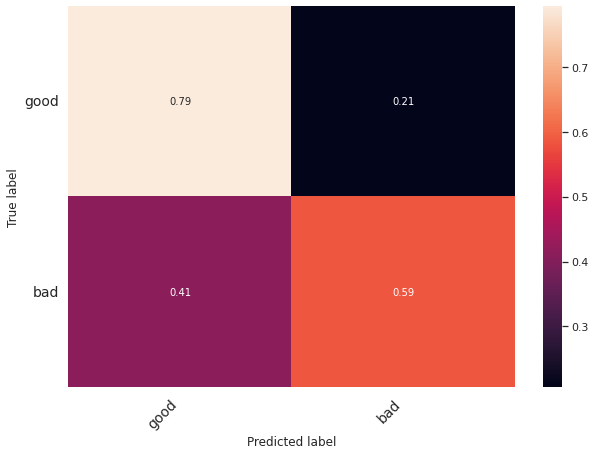

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Calculate confusion matrix
confusion_matrix_rf = confusion_matrix(y_true = bankloan_test_noWoE['Default'],
                    y_pred = rf_pred_class_test)

# Turn matrix to percentages
confusion_matrix_rf = confusion_matrix_rf.astype('float') / confusion_matrix_rf.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_rf, index=['good', 'bad'], columns=['good', 'bad'],
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

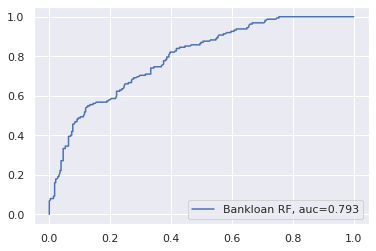

In [ ]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(bankloan_test_noWoE['Default'], rf_probs_test[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = bankloan_test_noWoE['Default'],
                             y_score = rf_probs_test[:,1]),
              decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="Bankloan RF, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
bankloan_train_noWoE.iloc[:, :-1].columns

Index(['Age', 'Employ', 'Address', 'Income', 'Leverage', 'Creddebt', 'OthDebt',
       'MonthlyLoad', 'OthDebtRatio'],
      dtype='object')

Text(0.5, 1.0, 'Variable Importance - Random Forest')

[Text(0, 0.5, 'Variable'), Text(0.5, 0, 'Variable Importance (Entropy)')]

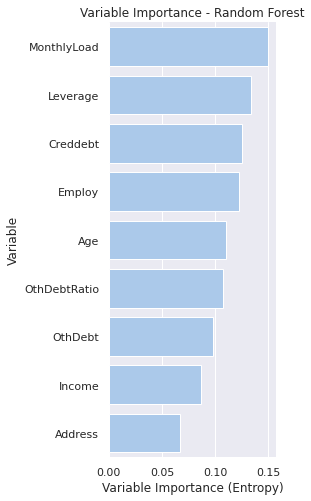

In [ ]:
# Plot variable importance
importances = bankloan_rf.feature_importances_
indices = np.argsort(importances)[::-1]

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - Random Forest")
sns.set_color_codes("pastel")
sns.barplot(y=[bankloan_train_noWoE.iloc[:, :-1].columns[i] for i in indices],
            x=importances[indices],
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

# XGBoosting

In [ ]:
from xgboost import XGBClassifier
#Define the classifier.
XGB_Bankloan = XGBClassifier(max_depth=2,                 # Depth of each tree
                            learning_rate=0.1,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=50,             # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=2,                    # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=1,           # Balancing of positive and negative weights. G / B
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=20201108,        # Seed
                            missing=None,                 # How are nulls encoded?
                            #tree_method='gpu_hist',       # How to train the trees?
                            #gpu_id=0                      # With which GPU?
                            )

In [ ]:
# Define the parameters. Play with this grid!
param_grid = dict({'n_estimators': [50, 100, 150],
                   'max_depth': [2, 3, 4],
                 'learning_rate' : [0.01, 0.05, 0.1, 0.15]
                  })

In [ ]:
# Always a good idea to tune on a reduce sample of the train set, as we will call many functions.
val_train = bankloan_train_noWoE.sample(frac = 0.5,               # The fraction to extract
                                       random_state = 20201108,    # The seed.
                                       )

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define grid search object.
GridXGB = GridSearchCV(XGB_Bankloan,        # Original XGB.
                       param_grid,          # Parameter grid
                       cv = 3,              # Number of cross-validation folds.
                       scoring = 'roc_auc', # How to rank outputs.
                       n_jobs = 2,          # Parallel jobs. -1 is "all you have"
                       refit = False,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1          # If to show what it is doing.
                      )

In [ ]:
# Train grid search.
GridXGB.fit(val_train.iloc[:, :-1], val_train['Default'])

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(gamma=0.001, max_depth=2, n_estimators=50,
                                     n_jobs=2, random_state=20201108,
                                     reg_alpha=1, reg_lambda=0,
                                     subsample=0.632),
             n_jobs=2,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             refit=False, scoring='roc_auc', verbose=1)

In [ ]:
# Show best params
print('The best AUC is %.3f' % GridXGB.best_score_)
GridXGB.best_params_

The best AUC is 0.808


{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 150}

In [ ]:
# Create XGB with best parameters.
XGB_Bankloan = XGBClassifier(max_depth=GridXGB.best_params_.get('max_depth'), # Depth of each tree
                            learning_rate=GridXGB.best_params_.get('learning_rate'), # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=GridXGB.best_params_.get('n_estimators'), # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            #n_jobs=4,                     # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=1,           # Balancing of positive and negative weights.
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=20201107,        # Seed
                            missing=None,                 # How are nulls encoded?
                            tree_method='gpu_exact',       # How to train the trees?
                            gpu_id=0                      # With which GPU?
                            )

In [ ]:
# Train over all training data.
XGB_Bankloan.fit(bankloan_train_noWoE.iloc[:, :-1], bankloan_train_noWoE['Default'])

In [ ]:
# Plot variable importance
importances = XGB_Bankloan.feature_importances_
indices = np.argsort(importances)[::-1]

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - XGBoosting")
sns.set_color_codes("pastel")
sns.barplot(y=[bankloan_train_noWoE.iloc[:, :-1].columns[i] for i in indices], x=importances[indices],
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

In [ ]:
# Calculate probability
XGBClassTest = XGB_Bankloan.predict(bankloan_test_noWoE.iloc[:, :-1])
xg_probs_test = XGB_Bankloan.predict_proba(bankloan_test_noWoE.iloc[:, :-1])
xg_probs_test = xg_probs_test[:, 1]

# Calculate confusion matrix
confusion_matrix_xgb = confusion_matrix(y_true = bankloan_test_noWoE['Default'],
                    y_pred = XGBClassTest)

# Turn matrix to percentages
confusion_matrix_xgb = confusion_matrix_xgb.astype('float') / confusion_matrix_xgb.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_xgb, index=['good', 'bad'], columns=['good', 'bad'],
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

In [ ]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(bankloan_test_noWoE['Default'],
                                 xg_probs_test)

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = bankloan_test_noWoE['Default'],
                             y_score = xg_probs_test),
               decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="AUC - XGBoosting = " + str(auc))
plt.legend(loc=4)
plt.show()

# TreeSHAP

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.3 MB/s 


In [ ]:
import shap
shap.initjs() # Import Java engine.

In [ ]:
# Trains the game-theoretic model. Really complex so requires sampling.
explainer = shap.TreeExplainer(XGB_Bankloan,                         # The model
                              data = shap.sample(bankloan_train_noWoE.iloc[:, :-1],
                                                 100)  # Create a sample of 100 cases
                              )

# Applies model ot the full dataset.
shap_values = explainer.shap_values(bankloan_train_noWoE.iloc[:, :-1],
                                    check_additivity=False)

In [ ]:
shap.summary_plot(shap_values,                       # The Shapley values.
                  bankloan_train_noWoE.iloc[:, :-1], # The training sample
                  show=False)                        # Whether to print the model or not

# Let's save this as a PDF for later use.
plt.savefig('ShapSummaryPlot.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
shap.dependence_plot("Employ",                          # The variable to study
                     shap_values,                       # The Shapley values.
                     bankloan_train_noWoE.iloc[:, :-1], # The training sample
                     show=False)                        # Whether to print the model or not

plt.savefig('ShapEmploy.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Predict probabilities of scorecard.
logreg_probs_test = bankloan_logreg.predict_proba(bankloan_test_WoE.iloc[:, 1:])

In [ ]:
# Set models and probabilities. This structure is called a dictionary.
models = [
{
    'label': 'Logistic Regression',
    'probs': logreg_probs_test[:,1]
},
{
    'label': 'Gradient Boosting',
    'probs': xg_probs_test
},
{
    'label': 'Random Forest',
    'probs': rf_probs_test[:,1]
}
]

# Loop that creates the plot. I will pass each ROC curve one by one.
for m in models:
  auc = roc_auc_score(y_true = bankloan_test_noWoE['Default'],
                             y_score = m['probs'])
  fpr, tpr, thresholds = roc_curve(bankloan_test_WoE['Default'],
                                           m['probs'])
  plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m['label'], auc))



# Settings
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plot!
plt.show()